In [292]:
import matplotlib.pyplot as plt
import time
import numpy as np
import unittest
from PIL import Image

In [293]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data
          points in an n-dimensional space.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters)]  # O(m * k)
        all_distances = np.zeros((data.shape[0], self.n_clusters))  # O(m * k)

        i = 0
        while i < self.max_iterations:  # O(I)
            for j, point in enumerate(self.centroids):  # O(k)
                centroid_distance = np.linalg.norm(data - point, axis=1)  # O(m * k * n)
                all_distances[:, j] = centroid_distance  # O(m)

            self.labels = np.argmin(all_distances, axis=1)  # O(m * k)
            updated_centroids = np.zeros_like(self.centroids)  # O(k)

            for j, point in enumerate(self.centroids):  # O(k)
                clustered_points = data[self.labels == j]  # O(m)
                if len(clustered_points) > 0:
                    updated_centroids[j] = np.mean(clustered_points, axis=0)  # O(m * k * n)
                else:
                    updated_centroids[j] = point

            if np.array_equal(self.centroids, updated_centroids):  # O(k * n)
                break

            self.centroids = updated_centroids  # O(k)
            i += 1

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data
          points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        if self.centroids is None:
            raise ValueError

        all_distances = np.zeros((data.shape[0], self.n_clusters))  # O(m * k)

        for j, point in enumerate(self.centroids):  # O(k)
            centroid_distance = np.linalg.norm(data - point, axis=1)  # O(k * m * n)
            all_distances[:, j] = centroid_distance  # O(m)

        self.labels = np.argmin(all_distances, axis=1)  # O(m * k)
        return self.labels

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids

Testing of KMeans:

In [294]:
def create_data(m, n, random_seed=None):
    '''
    Returns random data used for testing KMeans class
    '''
    if random_seed:
        np.random.seed(random_seed)
    data = np.random.rand(m, n)
    return data

class MyTest(unittest.TestCase):
    def test_kmeans_init(self):
        """
        Tests the init() method of the KMeans class.
        Checks that the initialized variables are the expected defined values.
        """
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        assert kmeans.n_clusters == 3
        assert kmeans.max_iterations == 100
        assert kmeans.random_state == 13
        assert kmeans.centroids == None
        assert kmeans.labels == None
    
    def test_kmeans_fit_1(self):
        """
        Tests the fit() method of the KMeans class.
        Checks that the centroids and labels are of the correct shape.
        """
        data = create_data(25,3, np.random.seed(13))
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        kmeans.fit(data)
        assert kmeans.centroids.shape == (3,3)
        assert kmeans.labels.shape == (25,)

    def test_kmeans_fit_2(self):
        """ 
        Tests the fit() method of the KMeans class.
        Checks that the manual calculation of the centroids if the same
        as the calculation in the fit() method.
        """
        data = create_data(25,3, np.random.seed(13))
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        kmeans.fit(data)
        updated_centroids = np.zeros_like(kmeans.centroids)
        for j, point in enumerate(kmeans.centroids):
            clustered_points = data[kmeans.labels == j]
            if len(clustered_points) > 0:
                updated_centroids[j] = np.mean(clustered_points, axis=0)
            else:
                updated_centroids[j] = point
        self.assertTrue(np.array_equal(kmeans.centroids, updated_centroids))

    def test_kmeans_empty_data(self):
        """
        Tests that a ValueError is raised for blank data inputs.
        """
        with self.assertRaises(ValueError):
            data = np.array([])
            kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
            kmeans.fit(data)

    def test_kmeans_predict(self):
        """
        This test will make sure the predict method is working as expected
        by clustering distinct groups of points. All the points in the test
        dataset should be clustered together.
        """
        np.random.seed(13)
        datatrain = np.array([[1.1, 1.2, 0.9], [5.2, 5.1, 5.3], [10.2, 9.8, 10.5]])
        datatest = np.array([[1.1, 1.2, 0.9], [1.1, 1.2, 0.9], [1.1, 1.2, 0.9]])
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        kmeans.fit(datatrain)
        labels = kmeans.predict(datatest)
        assert any([np.array_equal(labels, np.array([0, 0, 0])),
                np.array_equal(labels, np.array([1, 1, 1])),
                np.array_equal(labels, np.array([2, 2, 2]))])

    def test_order_operations(self):
        """
        This tests ensures that the predict method 
        cannot be run prior to the fit method.
        """
        data = np.array([[1.1, 1.2, 0.9], [5.2, 5.1, 5.3], [10.2, 9.8, 10.5]])
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        with self.assertRaises(ValueError):
            kmeans.predict(data)

    def test_kmeans_get_centroids(self):
        """
        This test will make sure the get_centroids method is working as expected
        by checking the shape of the returned centroids.
        """
        data = create_data(25,3, np.random.seed(13))
        kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=13)
        kmeans.fit(data)
        assert kmeans.get_centroids().shape == (kmeans.n_clusters, data.shape[1])

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(MyTest))


.......
----------------------------------------------------------------------
Ran 7 tests in 0.004s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

# Task 2


In [295]:
def m_experiment(n, i, k, m_values, random_seed=13):
    """
    Run KMeans clustering for different values number
    of data points and measures the runtime.

    Parameters:
    - n (int): Number of features.
    - i (int): Maximum number of iterations for KMeans.
    - k (int): Number of clusters for KMeans.
    - m_values (range): Range of number of data point values to be tested.
    - random_seed (int): Random seed for reproducibility.

    Returns:
    - list: Runtimes for each number of data points value.
    """
    alltimes_m = []
    for m in m_values:
        data = create_data(m, n, random_seed=random_seed)
        starttime = time.time()
        kmeans = KMeans(n_clusters=k, max_iterations=i, random_state=random_seed)
        kmeans.fit(data)
        endtime = time.time()
        runtime = endtime - starttime
        alltimes_m.append(runtime)

    return alltimes_m


def k_experiment(m, i, n, k_values, random_seed=13):
    """
    Run KMeans clustering for different values of k and measure the runtime.

    Parameters:
    - m (int): Number of data points.
    - i (int): Maximum number of iterations.
    - n (int): Number of features.
    - k_values (range): Range of k values to be tested.
    - random_seed (int): Random seed for reproducibility.

    Returns:
    - list: Runtimes for each k value.
    """
    alltimes_k = []

    for k in k_values:
        data = create_data(m, n, random_seed=random_seed)
        starttime = time.time()
        kmeans = KMeans(n_clusters=k, max_iterations=i, random_state=random_seed)
        kmeans.fit(data)
        endtime = time.time()
        runtime = endtime - starttime
        alltimes_k.append(runtime)

    return alltimes_k


def i_experiment(m, k, n, i_values, random_seed=13):
    """
    Run KMeans clustering for different values of maximum iterations and measures the runtime.

    Parameters:
    - m (int): Number of data points.
    - k (int): Number of clusters.
    - n (int): Number of features in the data.
    - i_values (range): Range of maximum iteration values to be tested.
    - random_seed (int): Random seed for reproducibility.

    Returns:
    - list: Runtimes for each maximum iteration value.
    """
    alltimes_i = []

    for i in i_values:
        data = create_data(m, n, random_seed=random_seed)
        starttime = time.time()
        kmeans = KMeans(n_clusters=k, max_iterations=i, random_state=random_seed)
        kmeans.fit(data)
        endtime = time.time()
        runtime = endtime - starttime
        alltimes_i.append(runtime)

    return alltimes_i


def n_experiment(m, i, k, n_values, random_seed=13):
    """
    Run KMeans clustering for different values of number
    of features and measures the runtime.

    Parameters:
    - m (int): Number of data points.
    - i (int): Maximum number of iterations.
    - k (int): Number of clusters.
    - n_values (range): Range of feature values to be tested.
    - random_seed (int): Random seed for reproducibility.

    Returns:
    - list: Runtimes for each feature value.
    """
    alltimes_n = []

    for n in n_values:
        data = create_data(m, n, random_seed=random_seed)
        starttime = time.time()
        kmeans = KMeans(n_clusters=k, max_iterations=i, random_state=random_seed)
        kmeans.fit(data)
        endtime = time.time()
        runtime = endtime - starttime
        alltimes_n.append(runtime)

    return alltimes_n


n, m, i, k = 4, 500, 500, 25
m_values = range(10, 1000, 10)
n_values = range(1, 200, 1)
i_values = range(10, 1000, 10)
k_values = range(1, 100, 1)

alltimes_m = m_experiment(n, i, k, m_values)
alltimes_k = k_experiment(m, i, n, k_values)
alltimes_i = i_experiment(m, k, n, i_values)
alltimes_n = n_experiment(m, i, k, n_values)

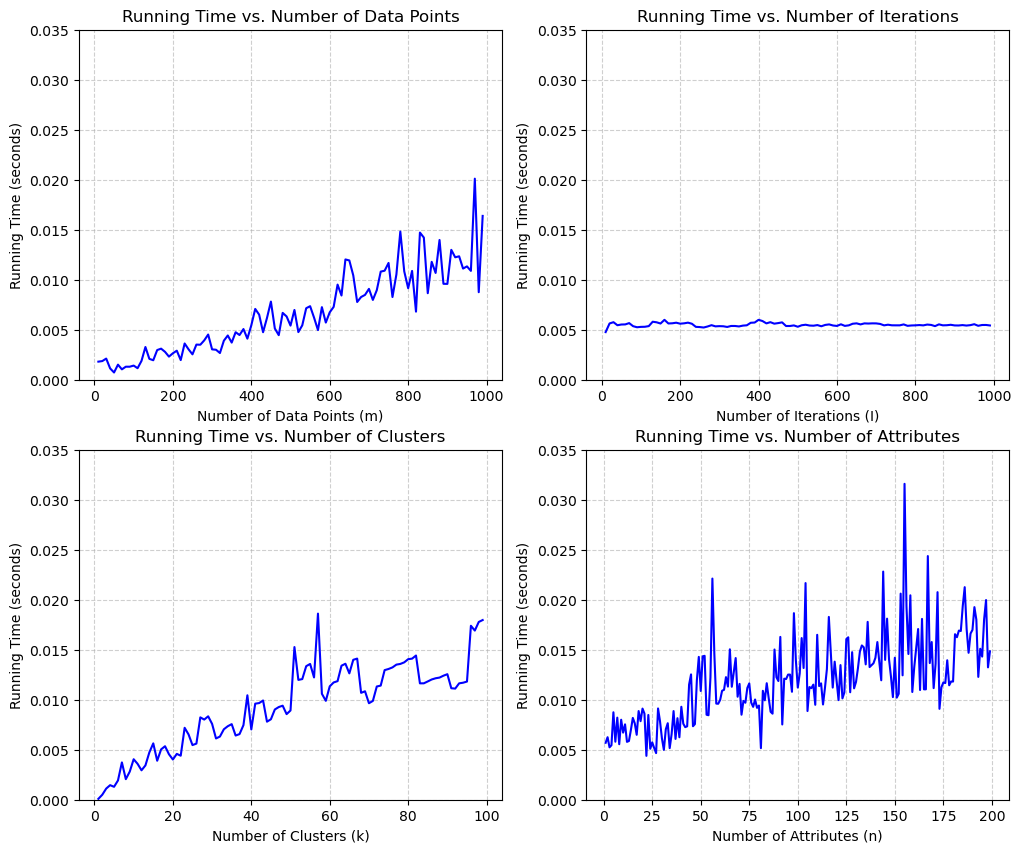

In [296]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(m_values, alltimes_m, linestyle='-', color='b')
axs[0, 0].grid(True, linestyle='--', alpha=0.6)
axs[0, 0].set_title('Running Time vs. Number of Data Points')
axs[0, 0].set_xlabel('Number of Data Points (m)')
axs[0, 0].set_ylabel('Running Time (seconds)')
axs[0, 0].set_ylim(0.000, .035)

axs[1, 0].plot(k_values, alltimes_k, linestyle='-', color='b')
axs[1, 0].grid(True, linestyle='--', alpha=0.6)
axs[1, 0].set_title('Running Time vs. Number of Clusters')
axs[1, 0].set_xlabel('Number of Clusters (k)')
axs[1, 0].set_ylabel('Running Time (seconds)')
axs[1, 0].set_ylim(0.000, .035)

axs[0, 1].plot(i_values, alltimes_i, linestyle='-', color='b')
axs[0, 1].grid(True, linestyle='--', alpha=0.6)
axs[0, 1].set_title('Running Time vs. Number of Iterations')
axs[0, 1].set_xlabel('Number of Iterations (I)')
axs[0, 1].set_ylabel('Running Time (seconds)')
axs[0, 1].set_ylim(0.000, .035)

axs[1, 1].plot(n_values, alltimes_n, linestyle='-', color='b')
axs[1, 1].grid(True, linestyle='--', alpha=0.6)
axs[1, 1].set_title('Running Time vs. Number of Attributes')
axs[1, 1].set_xlabel('Number of Attributes (n)')
axs[1, 1].set_ylabel('Running Time (seconds)')
axs[1, 1].set_ylim(0.000, .035)

plt.show()

# Discussion of trends

- In the first plot (# of data points vs runtime), a mostly linear increase in time can be shown as the number of data points increases. This is purely due to the increase in data size causing a longer runtime.
- In the second plot (# of iterations vs runtime), A mostly constant runtime is observed due to the convergence of centroids, leading to early stopping. The KMeans algorithm iteratively updates centroids until convergence or the maximum number of iterations is reached. If the centroids converge early, the algorithm terminates sooner, resulting in a more constant runtime despite the specified number of iterations.
- In the third plot (# of clusters vs runtime), a mostly linear increase in time can be shown as the number of clusters increase. More clusters mean more assignments and updates in each iteration so the runtime increases linearly with the number of clusters.
- In the fourth plot (# of attributes vs runtime), we see a mostly linear increase in time as the number of attributes increases. With more attributes, the computation involved in calculating distances and updating centroids increases as well. As a result, runtime increases linearly with the number of attributes.

These observations correspond directly with the time complexity for the KMeans algorithm of O(m * n * k * I). In practice, based on the graphs above however, it can be seen that the value of I would most likely never reach its full value due to early convergence.

# Task 3

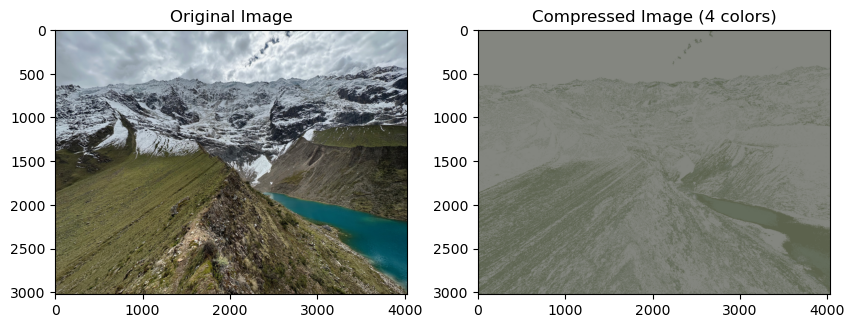

In [297]:
image_path = '/Users/nicholasmiller/Desktop/DataStructuresAlgorithms/IMG_0825.jpeg'
img = Image.open(image_path)
img_array = np.array(img)
original_shape = img_array.shape
reshaped_img_array = img_array.reshape((-1, 3))
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, max_iterations=100, random_state=42)
kmeans.fit(reshaped_img_array)
centroids = kmeans.get_centroids()
compressed_labels = kmeans.predict(reshaped_img_array)
compressed_img_array = centroids[compressed_labels].reshape(original_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(compressed_img_array.astype(np.uint8))
plt.title(f'Compressed Image ({n_clusters} colors)')
plt.show()

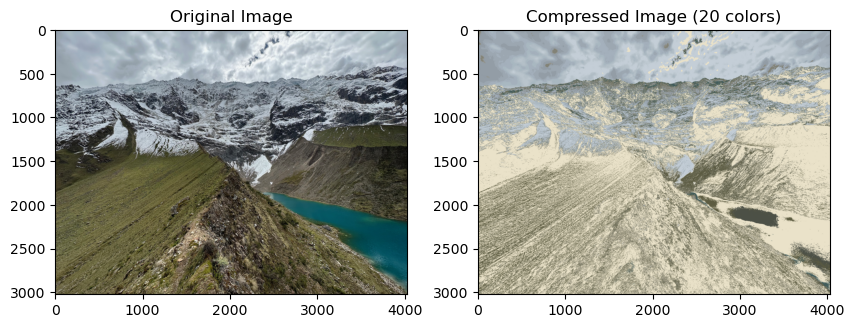

In [298]:
image_path = '/Users/nicholasmiller/Desktop/DataStructuresAlgorithms/IMG_0825.jpeg'
img = Image.open(image_path)
img_array = np.array(img)
original_shape = img_array.shape
reshaped_img_array = img_array.reshape((-1, 3))
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, max_iterations=100, random_state=42)
kmeans.fit(reshaped_img_array)
centroids = kmeans.get_centroids()
compressed_labels = kmeans.predict(reshaped_img_array)
compressed_img_array = centroids[compressed_labels].reshape(original_shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(compressed_img_array.astype(np.uint8))
plt.title(f'Compressed Image ({n_clusters} colors)')
plt.show()

# Discussion of Image Compression
The impact of compression is that there are fewer colors being displayed in the image. This means the picture is no longer as vibrant as can be seen above. If we were to change the number of clusters to exactly the number of colors in the photo, the image quality would likely not change at all, but since we changed the number of clusters to less than the number of colors, the quality decreases. This method could be helpful for reducing computational requirements by finding a number of clusters (colors) that still allow the picture to be crisp but also reduces the resources required to process the image.